In [54]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Activation 
from keras.optimizers import Adam
import seaborn as sns


<bound method NDFrame.head of      Tx Amplitude at -5  Tx Amplitude at -3  Tx Amplitude at -1.5  \
0              0.004218            0.018894              0.019226   
1              0.004217            0.018893              0.019299   
2              0.004215            0.018896              0.019292   
3              0.004215            0.018891              0.019285   
4              0.004216            0.018900              0.019307   
..                  ...                 ...                   ...   
175            0.005208            0.024287              0.057018   
176            0.005213            0.024236              0.057023   
177            0.005211            0.024247              0.057030   
178            0.005206            0.024226              0.057031   
179            0.005199            0.024281              0.057019   

     Tx Amplitude at -0.5  Tx Amplitude at 1  Tx Amplitude at 2  \
0                0.028832           0.005250           0.003319   
1      

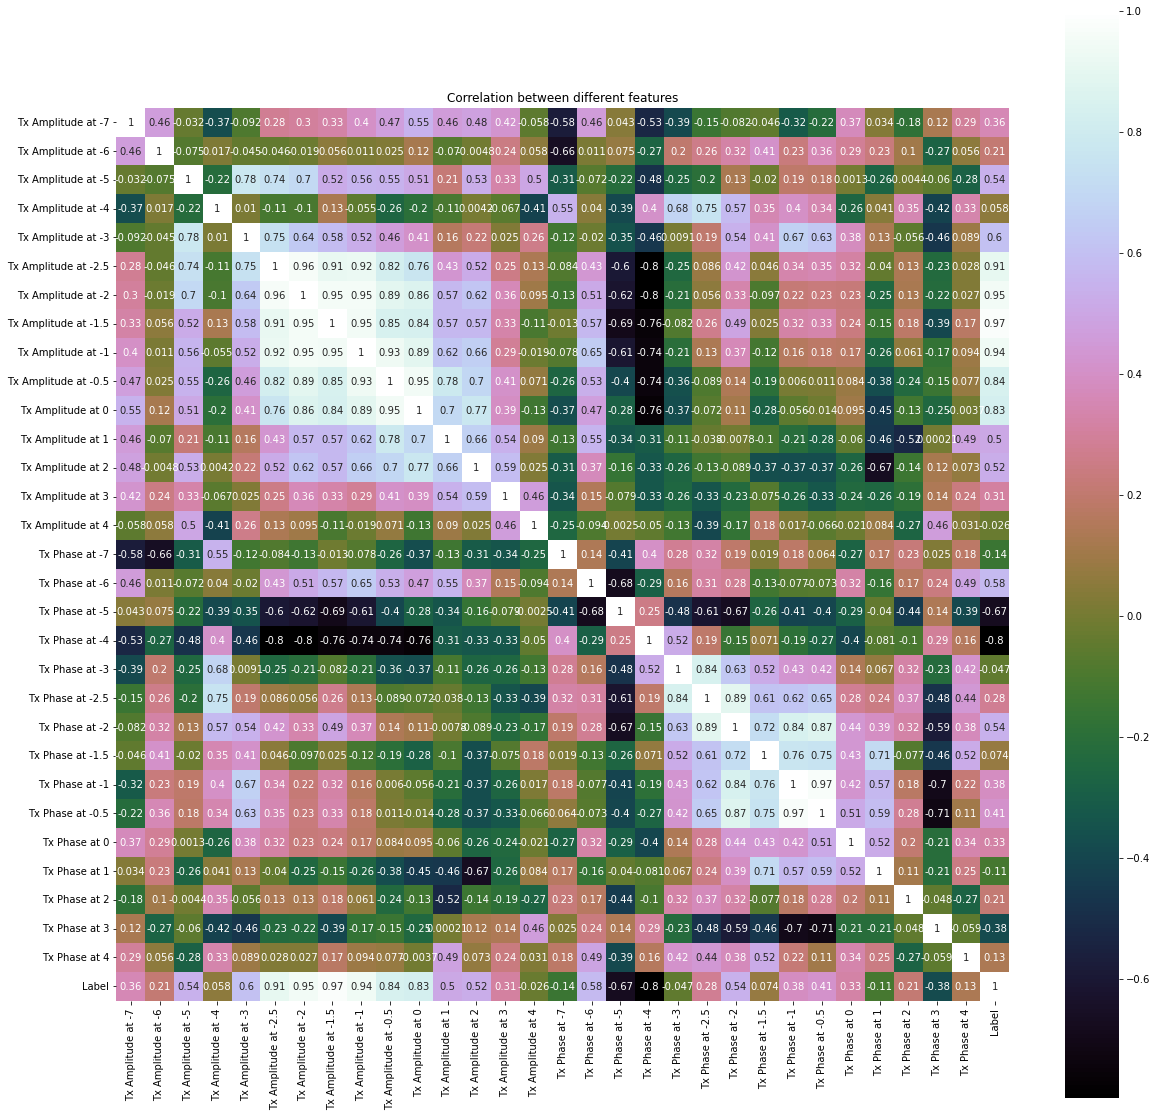

In [3]:
data = pd.read_csv("./Acoustic_Probing.csv")
data = data.drop(["ID", "Trial"], axis=1)
data = data.drop(data.loc[:, data.nunique() == 1], axis=1)

#When the csv reads in, it detects an extra row of NaN
data = data.dropna()

le = preprocessing.LabelEncoder()
data["Label"] = le.fit_transform(data["Label"].values)

#correlation matrix using heatmap.
correlationBetweenCols = data.corr(method="pearson")
plt.figure(figsize=(20,20))
sns.heatmap(correlationBetweenCols, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.title('Correlation between different features')


#Dropping the same values from SVM for consistency
data = data.drop(["Tx Amplitude at -2.5", "Tx Amplitude at -2", "Tx Amplitude at -1", "Tx Amplitude at 0", "Tx Phase at -2.5", "Tx Phase at -1.5", "Tx Phase at -1"], axis=1) # reduce highly correlated fields
data = data.drop(["Tx Amplitude at -7", "Tx Amplitude at -4", "Tx Amplitude at -6", "Tx Amplitude at 3", "Tx Amplitude at 4", "Tx Phase at -7", "Tx Phase at -3", "Tx Phase at -0.5", "Tx Phase at 0", "Tx Phase at 1", "Tx Phase at 2", "Tx Phase at 3", "Tx Phase at 4"], axis=1) 


print(data.head)

In [55]:
model = Sequential([
    Dense(20, input_dim=10, activation='sigmoid'),
    Dense(20, activation='sigmoid'),
    Dense(2, activation='softmax')
])

model.compile(Adam(lr=.001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

xtrain = data.iloc[:,0:10].to_numpy()
ytrain = data.iloc[:, 10].to_numpy()

model.fit(xtrain, ytrain, epochs=100, batch_size=64)

input = xtrain[2, :]

def predict_model(input):
    inputr = model(input.reshape(1, 10))[0]
    classes = sorted(np.unique(ytrain))
    prediction = classes[np.argmax(inputr)]
    return prediction
    
guesses = [predict_model(i) for i in xtrain]

print(ytrain, '\n', guesses, '\n', all(ytrain == guesses))


Epoch 1/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.6667
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.6667
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6428 - accuracy: 0.6667
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6350 - accuracy: 0.6667
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6274 - accuracy: 0.6667
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6201 - accuracy: 0.6667
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.6667
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6059 - accuracy: 0.6667
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5988 - accuracy: 0.6667
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5922 - accuracy: 0.6667
Epoch 11/100
3/3 [===========